In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial grid

In [2]:
rho_min, rho_max, min_delta_rho = 0.0, 5.0, 0.2
z_min, z_max, min_delta_z = -3.0, 6.0, 0.2

In [3]:
assert (rho_min >= 0) and (rho_min < rho_max)
assert (z_min < z_max)

def get_N_grid(xmin, xmax, min_delta_x): 
    return int((xmax-xmin+min_delta_x)/min_delta_x) + 1

N_rho = get_N_grid(rho_min, rho_max, min_delta_rho)
rho_arr = np.linspace(rho_min, rho_max, N_rho)
delta_rho = rho_arr[1] - rho_arr[0]

N_z = get_N_grid(z_min, z_max, min_delta_z)
z_arr = np.linspace(z_min, z_max, N_z)
delta_z = z_arr[1] - z_arr[0]

grid_shape = (N_rho, N_z)

In [4]:
drho, dz = delta_rho, delta_z  # aliasing

In [5]:
Rho, Z = np.meshgrid(rho_arr, z_arr, indexing='ij')

Dist1 = np.sqrt(np.square(Rho) + np.square(Z))
Dist2 = np.sqrt(np.square(Rho) + np.square(Z - 3.0))

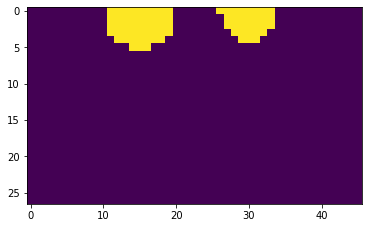

In [6]:
figg ,axx = plt.subplots()
axx.imshow((Dist1 < 1.0) | (Dist2 < 0.8))

# Construct a boundary condition array

In [7]:
bd_cond = np.ma.array(np.full(grid_shape, -1e10, dtype=float), mask=True)

bd_cond.mask[:,[0,-1]] = False
bd_cond.mask[-1,:] = False
if rho_arr[0] > 0: bd_cond.mask[0,:] = False
bd_cond.mask[Dist1 < 1.0] = False
bd_cond.mask[Dist2 < 0.7] = False

bd_cond[:,[0,-1]] = 0.0
bd_cond[-1,:] = 0.0
bd_cond[Dist1 < 1.0] = 1.0
bd_cond[Dist2 < 0.7] = 1.0

In [8]:
V = np.empty(bd_cond.shape, dtype=float)
V[:] = np.random.rand(*bd_cond.shape)
V[~bd_cond.mask] = bd_cond[~bd_cond.mask]

# Auto stop by checking convergence

In [9]:
c1 = 1.0 / (4.0 / drho**2 + 2.0 / dz**2)
c2 = 1.0 / (2.0/drho**2 + 2.0/dz**2)


for _ in range(100):
    
    V[0,1:-1] = c1 * (
        4.0 / drho**2 * V[1,1:-1]
        + 1.0 / dz**2 * (V[0,2:] + V[0,:-2])
    )

    V[1:-1,1:-1] = c2 * (
        1.0/drho**2 * (V[2:,1:-1] + V[:-2,1:-1]) 
        + (1.0/2.0/drho /rho_arr[1:-1] * (V[2:,1:-1] - V[:-2,1:-1]).transpose()).transpose()
        + 1.0/dz**2 * (V[1:-1,2:] + V[1:-1,:-2])
    )
    
    V[~bd_cond.mask] = bd_cond[~bd_cond.mask]

# Eval and Draw E field line

# Get normal E (.. well, there would only left normal component though) and eval charge dist.

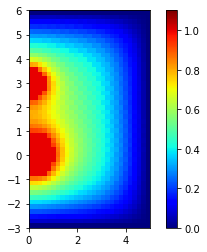

In [10]:
fig, ax = plt.subplots()
img = ax.imshow(V.transpose(), origin='lower', extent=(rho_min,rho_max,z_min,z_max), cmap='jet', vmax=1.1)
cb = fig.colorbar(img, ax=ax)

In [11]:
# fig.savefig("laplace-cylin-two-sphere-test-6.png")